In [110]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np
from tqdm import tqdm
import os
from subprocess import Popen, PIPE

In [126]:
dots_bin = '/home/sergei/Documents/repos/git/EPFL/CHILI/Cellulo/qml-ar/examples/97_detect_dots/97_detect_dots'
img = cv2.imread('20181027200059_IMG_20181027_195613.jpg')
out_fn = '/tmp/tmpimgcvdots.png'
#img = cv2.imread('IMG_20181027_195615.jpg')

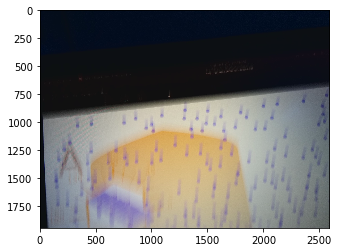

In [112]:
plt.imshow(img)

In [113]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [114]:
print np.max(np.max(hsv, axis = 0), axis = 0)
print np.min(np.min(hsv, axis = 0), axis = 0)

[179 255 230]
[ 0  0 13]


In [115]:
# H: -10,10 (from 180)
# S: 100, 255 (from 255)
# V: 50,255 (from 255)

In [116]:
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

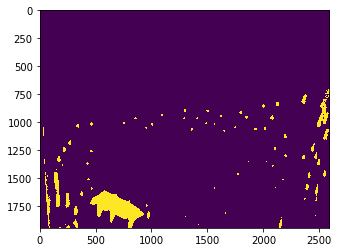

In [117]:
h_mask = (h <= 25) | (h >= 160)
s_mask = (s >= 50)
v_mask = (v >= 100)
mask = h_mask & s_mask & v_mask
plt.imshow(1. * mask)

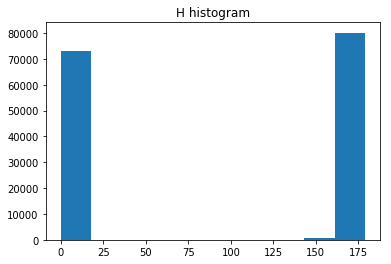

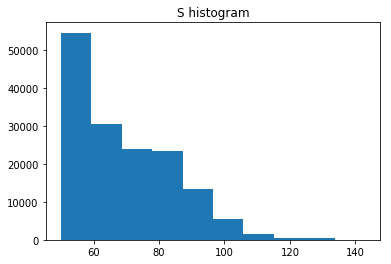

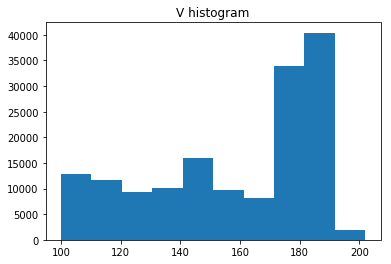

In [118]:
fields = 'HSV'
for i in range(3):
    plt.figure()
    plt.title('%s histogram' % fields[i])
    plt.hist(hsv[mask][:,i])
    plt.show()

In [127]:
cv2.imwrite(out_fn, 1. * mask)

True

In [156]:
def get_dots(in_fn):
    p = Popen([dots_bin], stdin=PIPE, stdout=PIPE) #NOTE: no shell=True here
    data = p.communicate(os.linesep.join([in_fn, 'exit']))[0]
    data = data.split('\n')[1:-1]
    data = [x.split() for x in data]
    data = [[float(z) for z in x] for x in data]
    return data

In [160]:
data = get_dots(out_fn)

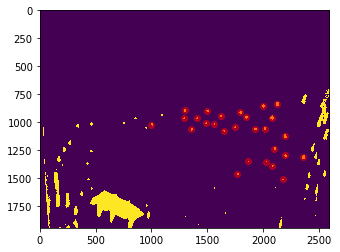

In [166]:
plt.figure()
plt.imshow(mask)
plt.scatter(*zip(*data), alpha = 0.5, c = 'red')
plt.show()